# Linear association: correlation

Let's take another look at the original Galton data, and ask about the *association* between the variables.  

:::{figure-md} galton_original
<img src="figures/galton_original.png" alt="galton_original" class="bg-white mb-1" size="180">

Galton's original data
:::

Intuitively, this is a question about two things: 
1. *how tightly packed* the points are around a single best fit line and 
2. *the nature of the relationship* between the variables: is it positive? negative? or nothing at all?

Here, the relationship is *positive*, in the sense that as one variable "goes up" the other "goes up".  But obviously there are some exceptions along the way: that is, there some observations with, say, bigger values of $X$ but smaller values of $Y$. It also is not especially tightly packed---there are some observations that are not on the same line (from bottom left to top right) as others.

It is not hard to find other variables with different apparent associations.  Let's load up the `states` data---which has information on many variables from the US states---and take a look.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
from scipy import stats

states_data = pd.read_csv("data/states_data.csv")

We will start with the degree to which the state has gun restrictions (`gun_scale11`, higher is more restrictions) with the proportion of state residents who hold `pro_life` views. Is this positive? negative? How linear is it?

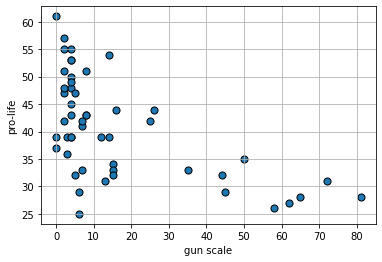

In [2]:
plt.scatter(states_data['gun_scale11'], states_data['prolife'], 
            s=50, edgecolors="black") 
plt.xlabel("gun scale")
plt.ylabel("pro-life")
plt.grid()
plt.show()

What about the proportion who are pro-choice versus the proportion who voted for Obama in 2012?

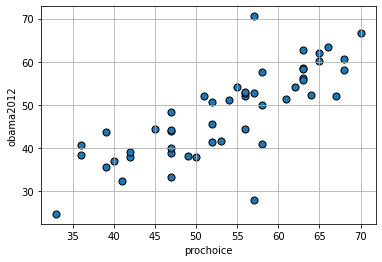

In [3]:
plt.scatter(states_data['prochoice'], states_data['obama2012'], 
            s=50, edgecolors="black") 
plt.xlabel("prochoice")
plt.ylabel("obama2012")
plt.grid()
plt.show()

Finally, what about the size of the population of the state and the unemployment rate of the state?

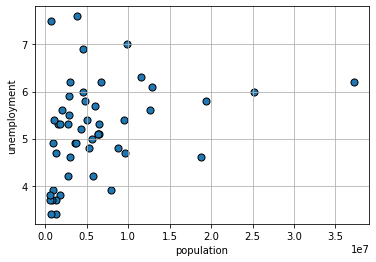

In [4]:
plt.scatter(states_data['pop2010'], states_data['unemploy'], 
            s=50, edgecolors="black")
plt.xlabel("population")
plt.ylabel("unemployment")
plt.grid()
plt.show()

## Linear Association
To get a sense of the association---that is, the direction and strength---of the relationship between the variables above, we didn't need to look at their *units*. For example, the pro-Choice/Obama relationship looks more positive and stronger than the population/unemployment one, and we don't need to know how these things were measured to say that.

This leads to two important observations: 
1. if the specific units don't matter for interpretation, then we can presumably present everything in some sort of *standard units*
2. and if we do *that*, and all the relationships are measured the same way, then we can very easily compare across scatterplots.

### Standard Units
The idea of putting variables into standard units is not new to us.  Recall when defined the **$Z$-Score** of an observation as

> the value of the observation minus the mean of the distribution, divided by the standard deviation of the distribution.

That is: 

$$
Z= \frac{X-\mu}{\sigma}
$$

where:
- $X$ is the value of the observation (the specific height, or weight, or income or whatever)
- $\mu$ is the value of the mean of the normal distribution from which it is drawn
- $\sigma$ is the value of the standard deviation of the normal distribution from which it is drawn

Subtracting the mean, and dividing by the standard deviation is a straightforward operation.  Let's do it for the pro-Choice/Obama figure. We begin by writing a simple function to do the standardizing: 

In [5]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

Next, we will convert the variables of interest, and then plot them:

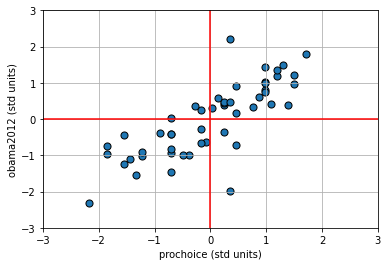

In [6]:
obamastd = standard_units(states_data['obama2012'])
prochoicestd  = standard_units(states_data['prochoice'])
                               
plt.scatter(prochoicestd, obamastd, s=50, edgecolors="black") 
plt.xlabel("prochoice (std units)")
plt.ylabel("obama2012 (std units)")
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.axhline(0,color="red")
plt.axvline(0,color="red")
plt.grid()
plt.show()

The red vertical and horizontal lines mark the means of the standardized variables (which are now zero). Once standardized like this, we can see that for this mostly *positive* association, the observations in the top left and bottom right quadrants are 'unusual' as regards the trend.  That is, they do not 'help' the general positive relationship; they weaken it, in some sense. This is logical insofar as they represent states with "low" pro-Choice values but "high" Obama votes (top left) *or* "high" pro-Choice values but "low" Obama votes (bottom right).

## Measuring the Association: Correlation Coefficient
Plots are helpful, but we would like something more precise.  We would like a *measure* of association.  Intuitively, that measure will answer the question

> how well does a straight line fit the relationship between these variables?

This will be informative about the two elements we have already discussed: 
- the *direction* of the relationship (positive, negative, zero)
- the *strength* of the relationship (from very strong, to weak, to zero)

In particular, we will use the **Correlation Coefficient**. This is often denoted as $r$, and the correlation between variables $x$ and $y$ is sometimes written as $r_{xy}$.  

To the extent that it is helpful, here is the mathematical definition of the (sample) correlation coefficient between $x$ and $y$:

$$
r_{xy}=\frac{1}{n-1}\sum^{n}_{i=1}\left(\frac{x_i-\bar{x}}{s_x}\right)\left(\frac{y_i-\bar{y}}{s_y}\right)
$$

This may look complicated, but is actually very simple, and we have met all the elements before:
- $\frac{x_i-\bar{x}}{s_x}$ is the $Z$-score for each value of the $x$ variable.  Literally, it is just the value of that observation on that variable, minus the mean of the variable, all divided out by the standard deviation of $x$ (which here we are writing as $s_x$)
- $\frac{y_i-\bar{y}}{y_x}$ is the $Z$-score for each value of the $y$ variable. 
- $\sum^{n}_{i=1}\left(\frac{x_i-\bar{x}}{s_x}\right)\left(\frac{y_i-\bar{y}}{s_y}\right) $ part is telling us to multiply the $Z$-score for the observations' $x$ variable values by the $Z$-scores for the observation's $y$ variable values and then just *add those products up*
- finally, $\frac{1}{n-1}$ tells us to divide that number by the sample size minus one.


### Properties and features 

The correlation coefficient

> measures the *linear association* between the variables

It takes value between $-1$ and $1$.  These end points correspond are
- a *perfect negative correlation* if $r=-1$
- a *perfect positive correlation* if $r= 1$

If $r=0$ we say the correlation is zero, or that there is no correlation, or that the variables are *orthogonal*.



To get a feel for how different correlations "look", we can write a function to generate $x$ and $y$ variables that have a specific correlation, and then plot them.  Here it is:

In [7]:
def r_scatter(r):
    plt.figure(figsize=(5,5))
    "Generate a scatter plot with a correlation approximately r"
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    plt.scatter(x, y, edgecolors="black" )
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    plt.title('Correlation = ' +str(r))
    plt.show()

Let's start out with a strong, positive correlation like $+0.95$:

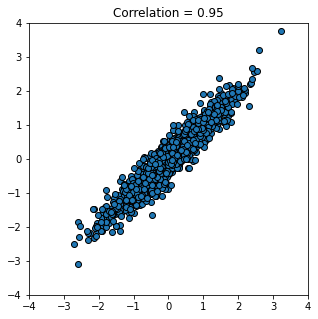

In [8]:
r_scatter(0.95)

And now a strong *negative* correlation:

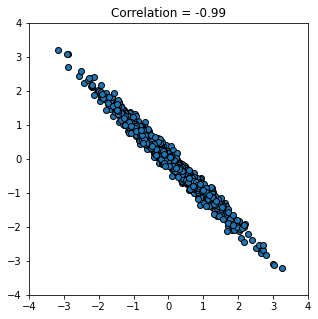

In [9]:
r_scatter(-0.99)

Finally, a weak correlation that is close to zero:

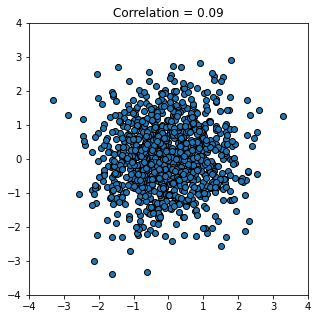

In [10]:
r_scatter(0.09)

There are several important features of correlation to be aware of:

####  1. It is **unitless**. 

Unlike the standard deviation or the original variable, correlation has no units.  This makes sense given it involves *standardizing* the variables that go into the calculation.

#### 2. A **linear rescaling of the variables has no effect on correlation**. 

That is, if we multiply/divide and/or add/subtract a number from one or both variables, it will not affect the correlation.  To give an example, suppose we measure the temperatures in *Fahrenheit* for Boston and NYC, every day for a year.  We find these temperatures to have a correlation of 0.58.  Now suppose we convert the NYC temperatures to centigrade.  This means we take our current temperatures ($x$) and do the following transformation:

$$
(x - 32) \times \frac{5}{9}
$$

But this involves subtracting a constant number (32) and multiplying by a constant number ($\frac{5}{9}$) and is a linear transformation.  So the correlation will not change. Indeed, we could transform the Boston temperatures too, and still the correlation will stay at 0.58.  

This *only* works for linear transformations.  If we use a *non-linear* transformation (like the logarithm) the correlation may change. 

#### 3. The correlation of a variable with *itself* is 1 
The correlation of $x$ with $x$ (or $y$ with $y$) is one.  It doesn't matter what the underlying values are.

#### 4. Correlation is *symmetric*

The correlation of $y$ with $x$ is the *same* as the correlation of $x$ with $y$.



We can demonstrate these properties with some simple code. First, we will define a correlation function: 

In [11]:
def correlation(t, x, y):
    return np.mean(standard_units(t[x])*standard_units(t[y]))

This is *almost* identical to our definition above, except that it ultimately divides by $n$ rather than $n-1$ (recall that the mean is $\frac{\sum x}{n}$ rather than $\frac{\sum x}{n-1}$).  But this won't make much difference for our large samples. First, we will show that correlations are symmetric:

In [12]:
correlation(states_data, "prochoice", "obama2012")

0.7903092457812848

In [13]:
correlation(states_data, "obama2012","prochoice" )

0.7903092457812848

These are identical, as expected.  Next, we can show that the correlation of a variable with itself is one (Python may return something arbitrary close to one, just due to the way it deals with floats):

In [14]:
correlation(states_data, "obama2012","obama2012" )

0.9999999999999999

## Calculating Correlation in Python
Given how useful correlation is, there are lots of ways to calculate it with Python.  Here are a few: first, using `numpy`:

In [15]:
np.corrcoef(states_data['prochoice'],states_data['obama2012'] )

array([[1.        , 0.79030925],
       [0.79030925, 1.        ]])

This returns the **correlation matrix**. It is telling you that the correlation between the variables and themselves are 1, while the correlation between $x$ and $y$ is 0.79.  We can request one element of the matrix, if we just want *that* correlation itself:

In [16]:
np.corrcoef(states_data['prochoice'],states_data['obama2012'] )[1,0]

0.7903092457812844

The `stats` package uses a function called `.pearsonr` and by default it returns a $p$-value too.  We don't need that, so we will just request the first element of the output (`[0]`):

In [17]:
stats.pearsonr(states_data['prochoice'],states_data['obama2012'] )[0]

0.7903092457812847

Finally, `pandas` will return a matrix, and we have to set the data up in a slightly different way.  Specifically we need to subset the original data frame:

In [18]:
proc_obama = states_data[['prochoice','obama2012']]
proc_obama.corr()

prochoice  obama2012
prochoice   1.000000   0.790309
obama2012   0.790309   1.000000

## Correlation, Causation, Prediction

As correlation is a measure of (linear) association.  And in our earlier chapters we established that association *does not imply* causation.  We may therefore conclude that **correlation does not imply causation**.  It is, of course, easy to find correlated variables that are not causally related: for example, our earlier classic case of ice cream consumption versus drowning.  

What about *prediction*? Well, in the ice cream versus drowning case, we can imagine that even though correlation does tell us directly about causation, it might help us predict.  For example, if we know that ice cream consumption is high (and nothing else) that tells us to expect more drowning deaths. There are several cases like this.  For instance, knowing your neighbors' first names is a good predictor of whether you will turn out to vote at the next election (relative to not knowing their names).  This doesn't seem likely to be causal: telling you your neighbors' names seems unlikely to get you to vote if you were not already intending to.  But it may still be a good predictor.  Similarly, having yellow stained fingers is a good predictor of poor lung health---but it isn't causal *per se*.  That is, painting someone's fingers yellow won't make their lungs worse.  

The general point here, and an important one for data science, is that we may be able to *predict* something well while not really understanding the *causal mechanism* behind it.  

A final, natural question at this point is to reverse the inquiry above: we know that correlation does not imply causation, but does causation imply correlation?  That is, if $X$ causes $Y$, can be guarantee that $Y$ will be correlated with $X$ (i.e. the correlation will not be zero).  The answer is "no", but it is somewhat subtle.  

For one thing, depending on how our data arrives and is selected, correlations can be zero even if there is a strong underlying causal relationship. For example, it turns out that basketball ability and height *are* correlated in the population.  But this is not true in the National Basketball Association (the pro-league): or at least, tall players are not paid more. This is due to a phenomenon called *conditioning on a collider*, which we will cover later.  

The main idea here is that NBA players are *selected* in a way that their other skills exactly offset their height disadvantage: for example, a player who is shorter, is in a team for some non-height related reason.  Maybe they are more athletic, more skilled, better at leading. When looking at the league as a whole, this reduces the correlation between height and salary to zero.

Another way that variables may have causal relationships with each other but no (or low) correlations is because the relationship is *non*-linear.

### Correlation and non-linear relationships
Consider the following figure of (an archetypal) proposed relationship between pressure ("arousal") and performance.

:::{figure-md} yerkes_dodson
<img src="figures/yerkes_dodson.png" alt="yerkes_dodson" class="bg-white mb-1" width="400">

Hebbian version of the Yerkes-Dodson Law
:::

The original work that produced the theory behind this plot is due to [Yerkes and Dodson (1908)](https://en.wikipedia.org/wiki/Yerkes%E2%80%93Dodson_law).  The basic idea is that as pressure increases on a subject, they perform at a higher capacity -- perhaps athletically or in an exam.  But when the pressure becomes too much, they start to become anxious and perform less well.

Suppose the theory holds *exactly* as stated, and the curve is symmetric as pictured.  What is the correlation between pressure and performance?  It is *zero*.  This is because correlation measures *linear* associations, and this is certainly not linear (a straight line cannot capture it).  Yet there is surely a *causal* relationship here.

We can see this for ourselves by generating some outcome that is simply the predictor variable squared: $y=-x^2$:

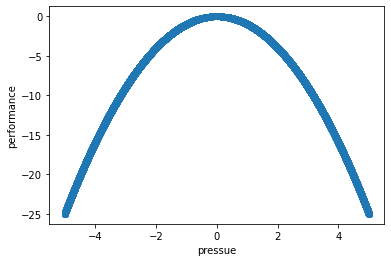

In [19]:
x_var = np.arange(-5,5,0.001)
y_var = -x_var**2
plt.scatter(x_var, y_var)
plt.xlabel("pressue")
plt.ylabel("performance")
plt.show()

The correlation is (approximately) zero:

In [20]:
np.corrcoef(x_var,y_var )[1,0]

0.00038729831202597966

A final comment here is that a particular correlation value is consistent with many different types of relationships.  The figure shows "[Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)".  Each subfigure is from one of four different data sets.  The correlation in each data set between $x$ and $y$ is 0.816.  Yet the nature of the relationship varies considerably!

:::{figure-md} quartet
<img src="figures/quartet.png" alt="quartet" class="bg-white mb-1" size="180">

Anscombe's quartet
:::